In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-route-database/routes.csv
/kaggle/input/iris/database.sqlite
/kaggle/input/iris/Iris.csv


**1. Load a dataset of your choice, display the first11 rows, display a row of that dataset having missing values, and replace missing values with Nan.**

In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv("../input/flight-route-database/routes.csv")
print(data.head(11))
print(data[data.isnull().any(axis=1)].head(1))
data.replace(to_replace=np.nan,value=0)

   airline airline ID  source airport  source airport id  \
0       2B        410             AER               2965   
1       2B        410             ASF               2966   
2       2B        410             ASF               2966   
3       2B        410             CEK               2968   
4       2B        410             CEK               2968   
5       2B        410             DME               4029   
6       2B        410             DME               4029   
7       2B        410             DME               4029   
8       2B        410             DME               4029   
9       2B        410             EGO               6156   
10      2B        410             EGO               6156   

    destination apirport  destination airport id  codeshare   stops  equipment  
0                    KZN                    2990        NaN       0        CR2  
1                    KZN                    2990        NaN       0        CR2  
2                    MRV            

,airline,airline ID,source airport,source airport id,destination apirport,destination airport id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,0,0,CR2
1,2B,410,ASF,2966,KZN,2990,0,0,CR2
2,2B,410,ASF,2966,MRV,2962,0,0,CR2
3,2B,410,CEK,2968,KZN,2990,0,0,CR2
4,2B,410,CEK,2968,OVB,4078,0,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,0,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,0,0,734
67660,ZM,19016,FRU,2912,DME,4029,0,0,734
67661,ZM,19016,FRU,2912,OSS,2913,0,0,734


**2. Given the score of CSK, KKR, DC, and MI such that no two teams has the same score, chalk out an appropriate graph for the best display of the scores. Also, highlight the team having the highest score in the graph.¶**

Text(0, 0.5, 'SCORE')

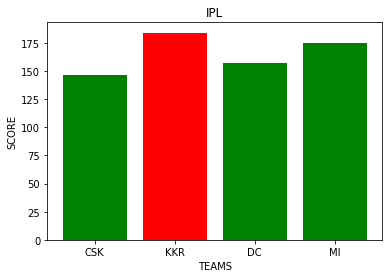

In [3]:
import matplotlib.pyplot as plt
team=['CSK','KKR','DC','MI']
score=[146,184,157,175]
    
      
plt.bar(team,score,color=['green','red','green','green'])
plt.title('IPL')
plt.xlabel('TEAMS')
plt.ylabel('SCORE')

**3. Take two NumPy array of your choice, find the common items between the arrays, and remove the matching items but only from one array such that they exist in the second one.**

In [4]:
a = np.array([1,8,2,6,4,9])
b = np.array([1,3,6,5])

c = np.intersect1d(a,b) #Finding the common items

print("Common items are: ",c)
print("\n")
for i in b:
    for j in a:
        if i == j:
            a = a[a!=j] #removing the common items from the array "a"
print(" 1st array:",a)
print("\n")
print(" 2nd array:",b)

Common items are:  [1 6]


 1st array: [8 2 4 9]


 2nd array: [1 3 6 5]


**4. Write a program to display the confusion matrix and f1_score on the iris dataset.¶**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

train = pd.read_csv("../input/iris/Iris.csv")


X = train.drop("Species",axis=1)
y = train["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

print("F1 Score:",f1_score(y_test, predictions,average='weighted'))
 
print("\nConfusion Matrix(below):\n")
confusion_matrix(y_test, predictions)

F1 Score: 1.0

Confusion Matrix(below):



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[17,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 16]])